In [8]:
import pandas as pd
import numpy as np

# Función para generar las calificaciones y determinar si el estudiante aprueba
def generar_dataset(n=100):
    # Generar calificaciones aleatorias entre 1 y 100 para tres materias
    materia1 = np.random.randint(1, 101, n)
    materia2 = np.random.randint(1, 101, n)
    materia3 = np.random.randint(1, 101, n)

    # Calcular el promedio final y redondearlo al entero más cercano
    promedio_final = np.round((materia1 + materia2 + materia3) / 3)

    # Etiquetar como 'Aprobado' (1) si el promedio es mayor a 80, de lo contrario 'Reprobado' (0)
    aprobado = np.where(promedio_final > 80, 1, 0)

    # Crear un DataFrame
    data = pd.DataFrame({
        'Estudiante_ID': np.arange(1, n+1),
        'Materia1': materia1,
        'Materia2': materia2,
        'Materia3': materia3,
        'Promedio_Final': promedio_final,
        'Aprobado': aprobado
    })

    # Guardar el DataFrame en un archivo CSV
    data.to_csv('calificaciones.csv', index=False)

    return data

# Generar el dataset
dataset = generar_dataset()

In [7]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Leer el dataset desde el archivo CSV
data = pd.read_csv('calificaciones.csv')

# Preprocesamiento de los datos
X = data[['Materia1', 'Materia2', 'Materia3', 'Promedio_Final']]
y = data['Aprobado']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM
clf = svm.SVC(kernel='linear')  # Se puede ajustar el kernel a 'rbf', 'poly', etc.
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 1.00


<ipython-input-4-91cb53ac1693>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_materia1[y_pred == 0], X_test_materia2[y_pred == 0], edgecolor='black', facecolor='none', label='Reprobado (Predicho)', marker='x')


Text(0.5, 1.0, 'Clasificación de estudiantes según calificaciones en dos materias')

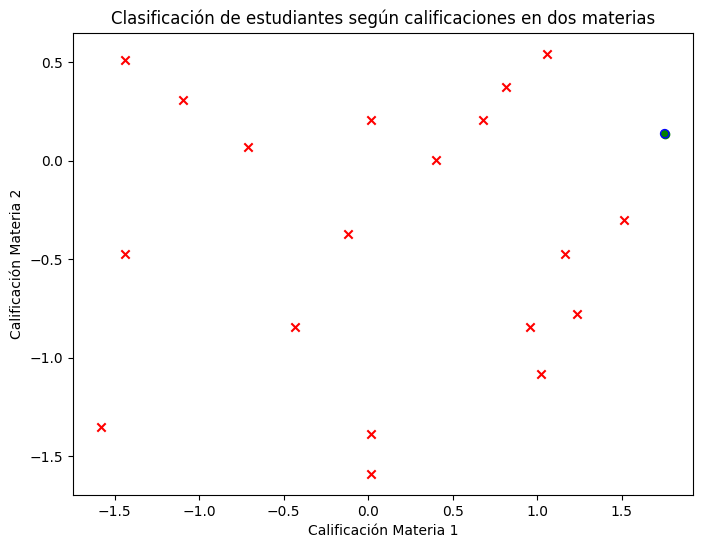

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Datos reales (test set)
X_test_materia1 = X_test[:, 0]  # Materia1
X_test_materia2 = X_test[:, 1]  # Materia2

# Crear la gráfica de dispersión
plt.figure(figsize=(8,6))

# Puntos para los estudiantes reprobados (etiqueta 0)
plt.scatter(X_test_materia1[y_test == 0], X_test_materia2[y_test == 0], color='red', label='Reprobado (Real)', marker='x')

# Puntos para los estudiantes aprobados (etiqueta 1)
plt.scatter(X_test_materia1[y_test == 1], X_test_materia2[y_test == 1], color='green', label='Aprobado (Real)', marker='o')

# Puntos predichos como aprobados por el modelo
plt.scatter(X_test_materia1[y_pred == 1], X_test_materia2[y_pred == 1], edgecolor='blue', facecolor='none', label='Aprobado (Predicho)', marker='o')

# Puntos predichos como reprobados por el modelo
plt.scatter(X_test_materia1[y_pred == 0], X_test_materia2[y_pred == 0], edgecolor='black', facecolor='none', label='Reprobado (Predicho)', marker='x')

# Añadir leyenda y etiquetas
plt.xlabel('Calificación Materia 1')
plt.ylabel('Calificación Materia 2')
plt.title('Clasificación de estudiantes según calificaciones en dos materias')


Distribución de los datos: La mayoría de los puntos están clasificados como reprobados, lo que sugiere que en el conjunto de datos de prueba hay una proporción considerable de estudiantes con calificaciones bajas en las dos materias.

El modelo parece estar ajustado para identificar principalmente estudiantes reprobados. La presencia de solo un estudiante aprobado podría indicar que el modelo tiene una tendencia a clasificar erróneamente a los estudiantes aprobados o que, en efecto, hay muy pocos aprobados en el conjunto de datos.

In [ ]:
import pandas as pd  # Biblioteca para la manipulación y análisis de datos
from sklearn import svm  # Módulo para el algoritmo de clasificación SVM (Support Vector Machine)
from sklearn.model_selection import train_test_split  # Función para dividir el dataset en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Clase para normalizar las características (escalado de datos)
from sklearn.metrics import accuracy_score  # Función para calcular la precisión del modelo

# Leer el dataset desde un archivo CSV
# Este archivo contiene las calificaciones de los estudiantes y si han aprobado o no
data = pd.read_csv('calificaciones.csv')

# Preprocesamiento de los datos:
# X son las características del dataset (calificaciones de 3 materias y el promedio final)
# y es la variable objetivo, que indica si el estudiante aprobó (1) o no (0)
X = data[['Materia1', 'Materia2', 'Materia3', 'Promedio_Final']]
y = data['Aprobado']

# Escalado de características:
# Se usa StandardScaler para normalizar los datos de X, es decir, las calificaciones
# Esto convierte los valores en un rango estándar (media 0 y desviación estándar 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Transformamos las características escaladas

# Dividir los datos en conjuntos de entrenamiento y prueba:
# El 80% de los datos se utiliza para entrenamiento y el 20% para prueba
# random_state=42 asegura que la división sea reproducible (la misma en cada ejecución)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM:
# Se usa el modelo SVM con un kernel lineal. Un kernel define cómo los datos son mapeados en un espacio dimensional mayor
# 'linear' es uno de los tipos de kernel que puede ser utilizado. Otros incluyen 'rbf', 'poly', etc.
clf = svm.SVC(kernel='linear')  # Inicializamos el modelo con kernel lineal
clf.fit(X_train, y_train)  # Entrenamos el modelo con los datos de entrenamiento

# Hacer predicciones:
# Se usan los datos de prueba (X_test) para predecir los resultados (aprobado/no aprobado)
y_pred = clf.predict(X_test)

# Evaluar el modelo:
# Calculamos la precisión del modelo comparando las predicciones con los resultados reales
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo:
# La precisión indica qué porcentaje de las predicciones fueron correctas
print(f'Precisión del modelo: {accuracy:.2f}')
